In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
cancer = pd.read_csv("dataR2.csv", sep=",")
cancer.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [3]:
cancer.shape

(116, 10)

In [4]:
gb = cancer.groupby('Classification')
print(gb.mean())

                      Age        BMI     Glucose    Insulin      HOMA  \
Classification                                                          
1               58.076923  28.317336   88.230769   6.933769  1.552398   
2               56.671875  26.984740  105.562500  12.513219  3.623342   

                   Leptin  Adiponectin   Resistin       MCP.1  
Classification                                                 
1               26.637933    10.328205  11.614813  499.730692  
2               26.596512    10.061167  17.253777  563.016500  


In [5]:
cancer.corr()

Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI             0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose         0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin         0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA            0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin          0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin    -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin        0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1           0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   
Classification -0.043555 -0.132586  0.384315  0.276804  0.284012 -0.001078   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.219813  0.002742  0.013462       -0.043555  
BMI               -0.302735  0.195350  0.224038       -0.132586  
Glucose           -0.122121  0.291327  0.264879        0.384315  
Insulin           -0.031296  0.146731  0.174356        0.276804  
HOMA              -0.056337  0.231101  0.259529        0.284012  
Leptin            -0.095389  0.256234  0.014009       -0.001078  
Adiponectin        1.000000 -0.252363 -0.200694       -0.019490  
Resistin          -0.252363  1.000000  0.366474        0.227310  
MCP.1             -0.200694  0.366474  1.000000        0.091381  
Classification    -0.019490  0.227310  0.091381        1.000000

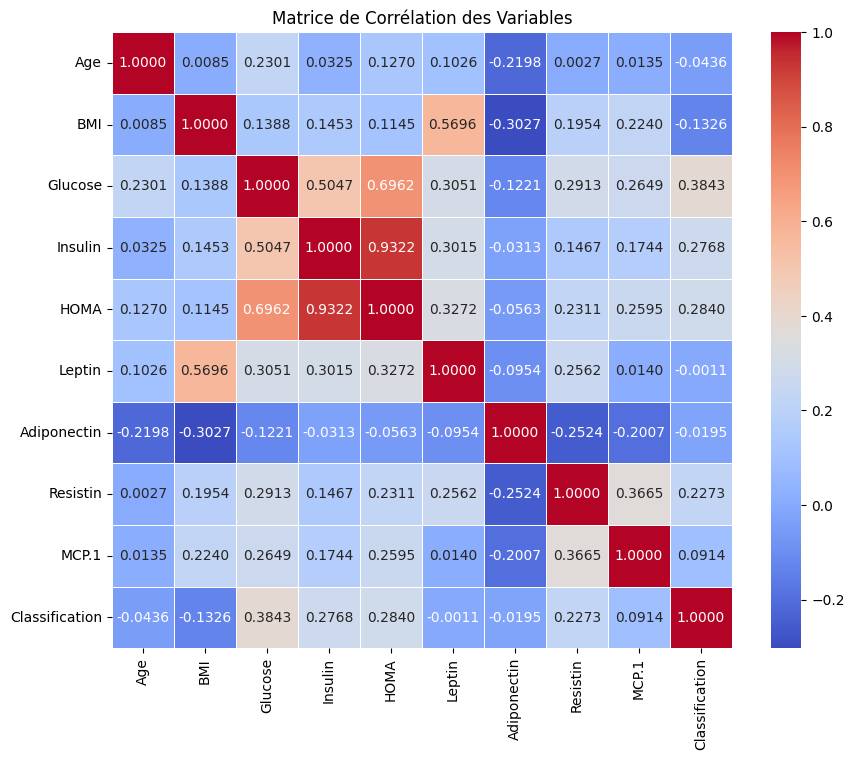

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(cancer.corr(), annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables")
plt.show()

Prédiction

In [7]:
X = cancer.drop(columns='Classification')
X.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  
0  417.114  
1  468.786  
2  554.697  
3  928.220  
4  773.920

In [8]:
y = cancer['Classification']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_train.shape)
print(y_train.shape)

training dataset
(92, 9)
(92,)

testing dataset:
(92, 9)
(92,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.svm import SVC

model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
model_svc = model_svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
model_dt = model_dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



In [69]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.25      0.33        12
           2       0.50      0.75      0.60        12

    accuracy                           0.50        24
   macro avg       0.50      0.50      0.47        24
weighted avg       0.50      0.50      0.47        24

